In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
import pickle
import time
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard



In [11]:
NAME = f'cats-vs-dogs-predictions-{int(time.time())}'


In [12]:
if os.name == 'nt':
    tensorboard = TensorBoard(log_dir=f'logs\\{NAME}\\')
else:
    tensorboard = TensorBoard(log_dir=f'logs/{NAME}/')

In [13]:
train_path=os.path.join('dogscats','train')
valid_path=os.path.join('dogscats','valid')
test_path = os.path.join('dogscats','test1')







train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory(train_path,
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory(valid_path,
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set1 = test_datagen.flow_from_directory(test_path,
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary',
                                            shuffle=False)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

classifier = Sequential()

classifier.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(256, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())

classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,092,225 (19.43 MB)

 Trainable params: 5,091,329 (19.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
classifier.fit(
    train_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[early_stopping, reduce_lr]
)

In [16]:
classifier.save('dogcat_model_initial.h5')


In [17]:
from tensorflow.keras.models import load_model
classifier = load_model('dogcat_model_final.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: [[0.00303677]]


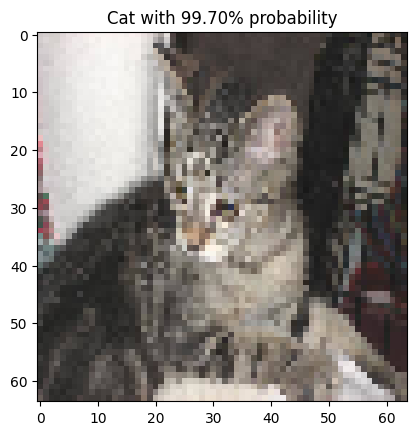

In [18]:
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1_path = os.path.join('dogscats','test1','images','test.122.jpg')
img1 = image.load_img(img1_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = np.expand_dims(img, axis=0)
img = img/255

prediction= classifier.predict(img)
print("Prediction:", prediction)


if prediction > 0.5:
    plt.title("Dog with {:.2f}% probability".format((prediction[0, 0]) * 100))
else:
    plt.title("Cat with {:.2f}% probability".format((1 - prediction[0, 0]) * 100))
plt.imshow(img1)
plt.show()

In [19]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step

/opt/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [20]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cats/cat.1001.jpg,0.05581,0,0
1,cats/cat.10016.jpg,0.02990,0,0
2,cats/cat.10026.jpg,0.13495,0,0
3,cats/cat.10048.jpg,0.23581,0,0
4,cats/cat.10050.jpg,0.14066,0,0
5,cats/cat.10064.jpg,0.21562,0,0
6,cats/cat.10071.jpg,0.00027,0,0
7,cats/cat.10091.jpg,0.01945,0,0
8,cats/cat.10103.jpg,0.00098,0,0
9,cats/cat.10104.jpg,0.00030,0,0


In [21]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 186


Text(50.722222222222214, 0.5, 'true value')

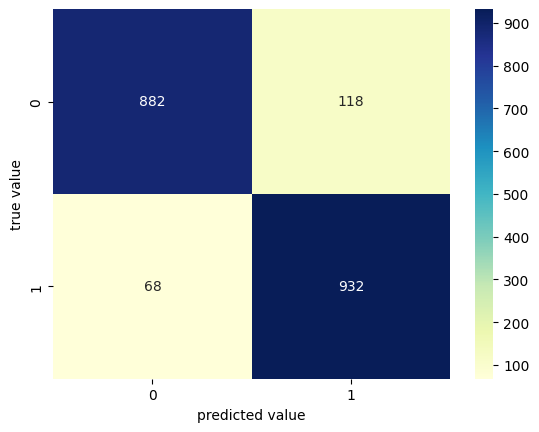

In [22]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value')

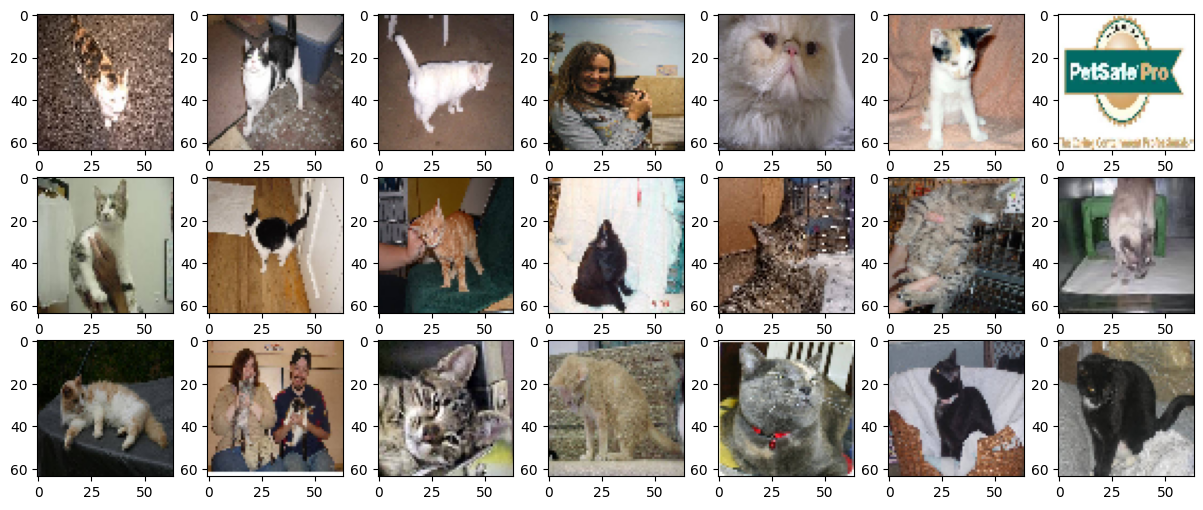

In [27]:
import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3

for i in range(columns*rows):
    img_path = os.path.join('dogscats','valid',CatasDog.iloc[i])
    img = image.load_img(img_path, target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()


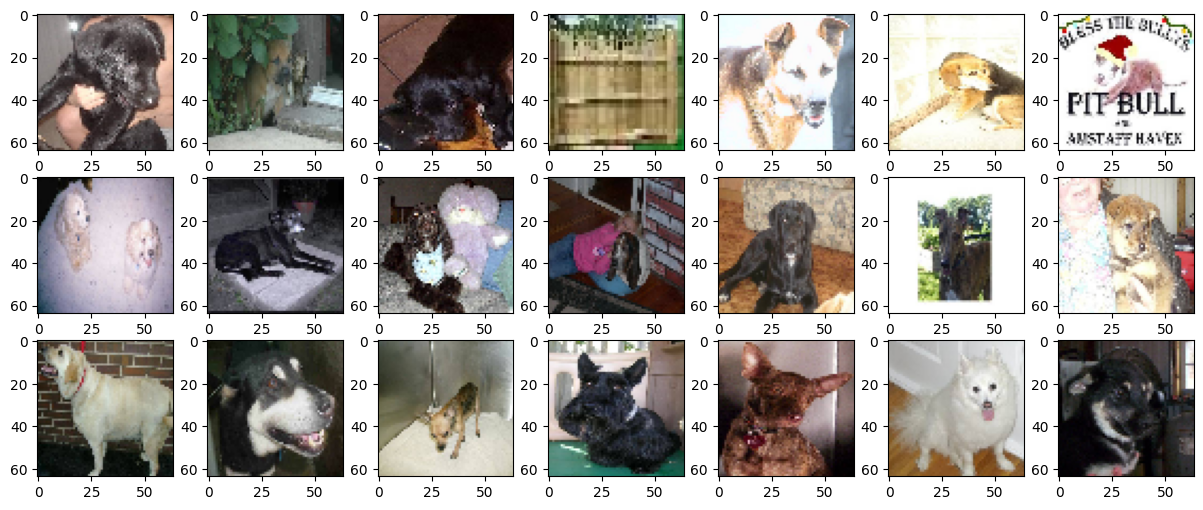

In [29]:
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg


DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    img_path = os.path.join('dogscats','valid',DogasCat.iloc[i])
    img = image.load_img(img_path, target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()


In [30]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,092,227 (19.43 MB)

 Trainable params: 5,091,329 (19.42 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

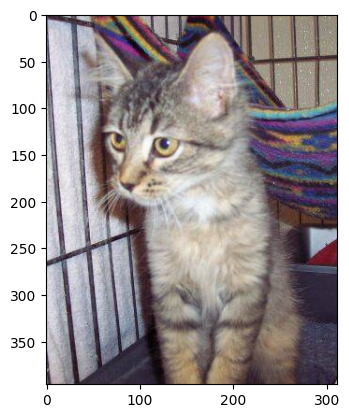

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = os.path.join('dogscats', 'valid', 'cats', 'cat.2.jpg')
img1 = image.load_img(img_path)
plt.imshow(img1)

img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [32]:
classifier.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[1.0736746e-05]], dtype=float32)

In [34]:
from tensorflow.keras.models import Model

li= [0,2]
outputs = [classifier.layers[i].output for i in li]
model_short = Model(inputs=classifier.inputs, outputs=outputs)
print(model_short.summary())


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 62, 62,    │      1,792 │ input_layer[0][0… │
│                     │ 64)               │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 62, 62,    │        256 │ conv2d[2][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,048 (8.00 KB)

 Trainable params: 1,920 (7.50 KB)

 Non-trainable params: 128 (512.00 B)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


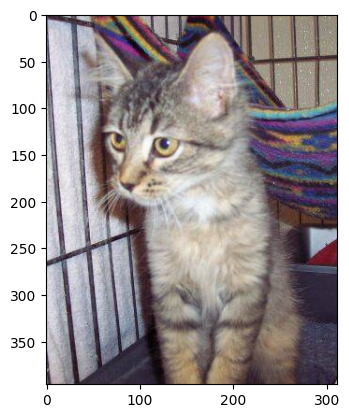

In [35]:

import numpy as np
from tensorflow.keras.preprocessing import image

img_path = os.path.join('dogscats','valid','cats','cat.2.jpg')
img1 = image.load_img(img_path)
plt.imshow(img1)

img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = np.expand_dims(img, axis=0)

feature_output = model_short.predict(img)

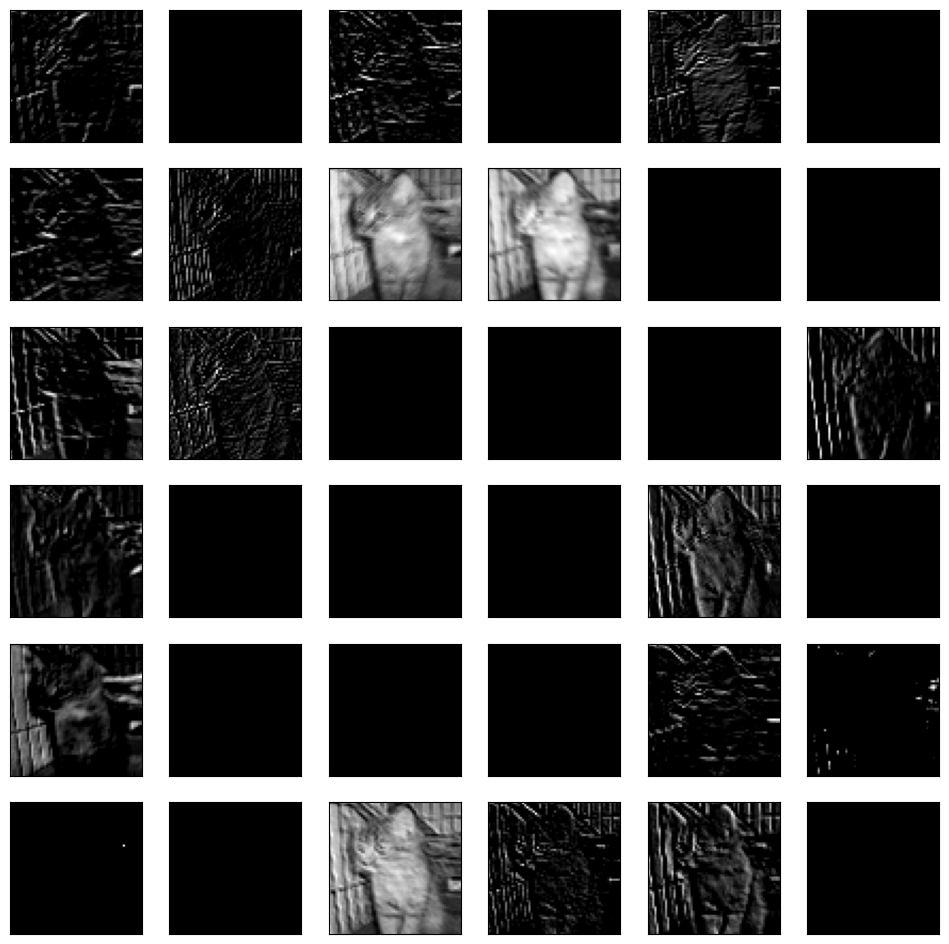

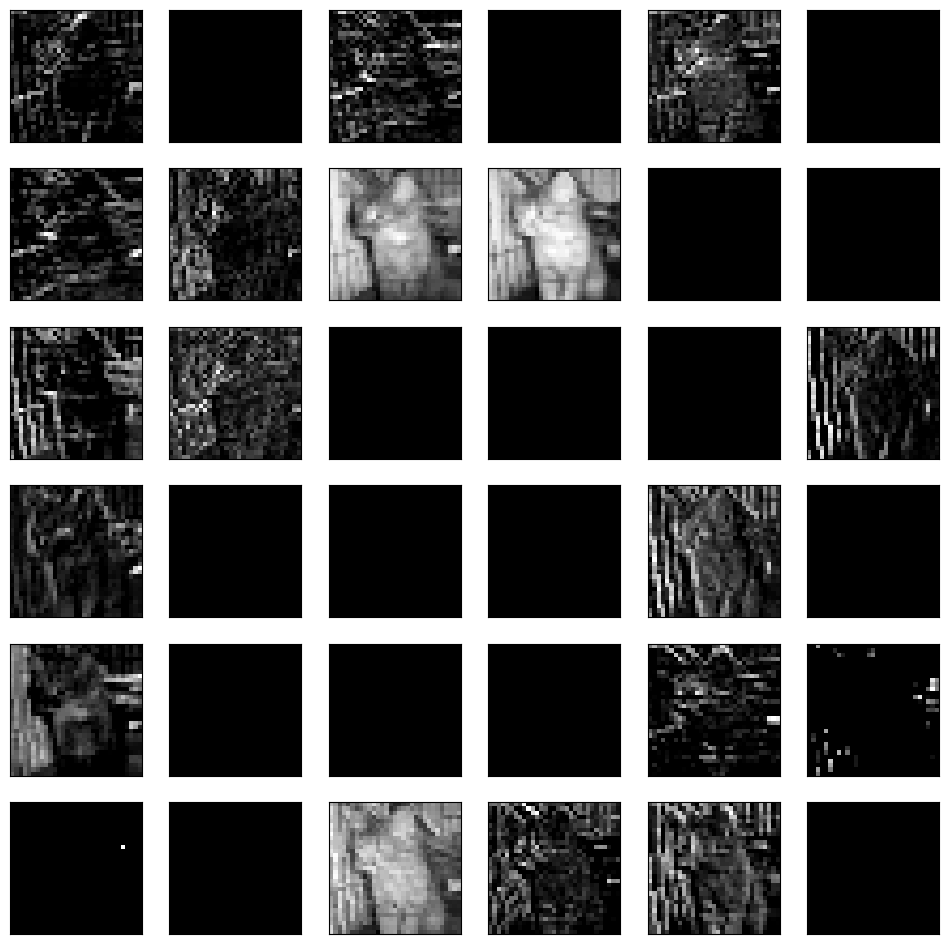

In [36]:
columns = 6
rows = 6
for ftr in feature_output:
    fig=plt.figure(figsize=(12,12))
    for i in range(1,columns*rows+1):
        fig= plt.subplot(rows,columns,i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0,:,:,i-5],cmap='gray')
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


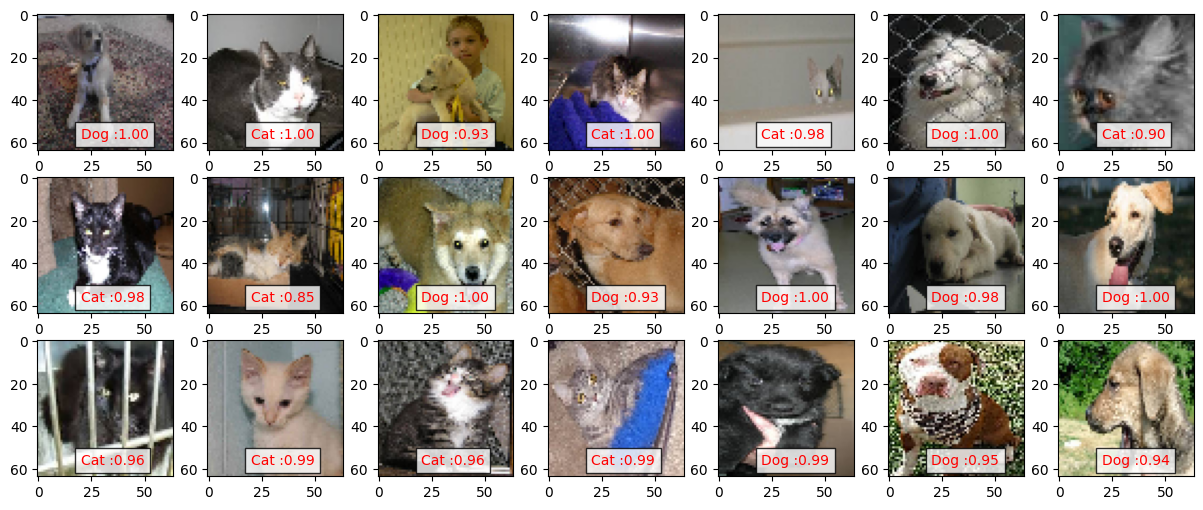

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_path = os.path.join('dogscats','test1',test_set1.filenames[np.random.choice(range(12500))])
    img1 = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1)
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)